In [ ]:
import spacy

In [ ]:

!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 795.0 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("en_core_web_lg")
nlp

In [ ]:
import json
with open('/content/Corona2.json', 'r') as f:
    data = json.load(f)

In [ ]:
data['examples'][0]

{'id': '18c2f619-f102-452f-ab81-d26f7e283ffe',
 'content': "While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]",
 'metadata': {},
 'annotations': [{'id': '0825a1

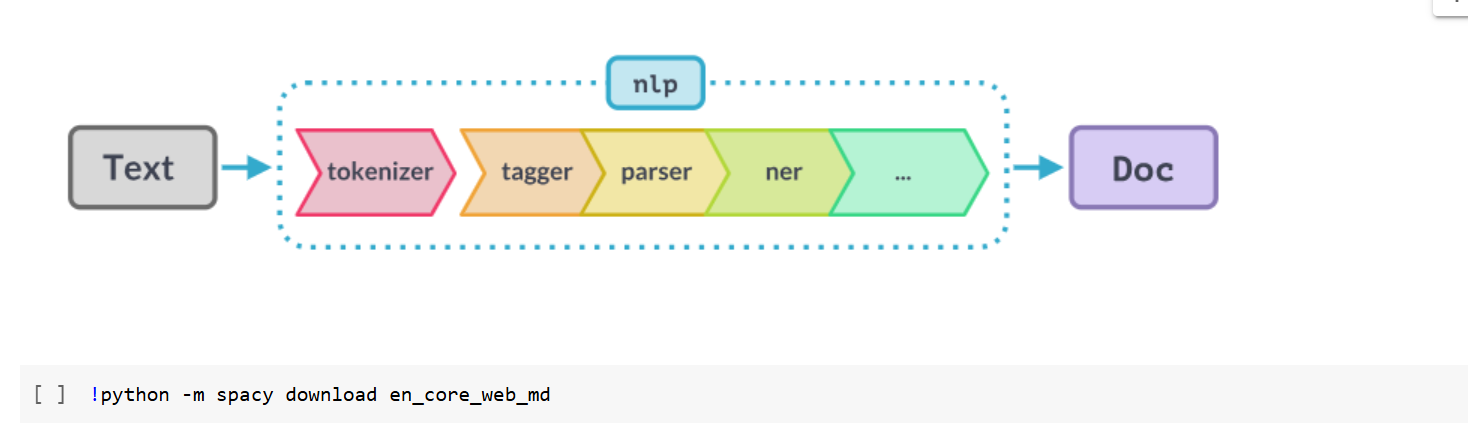

In [ ]:
# Initialize the list that will hold the processed training data
training_data = list()

# Start iterating through the 'examples' in 'data'
for example in data['examples']:
    # Create a temporary dictionary to store the current example's data
    temp_dict = dict()

    # Extract the 'content' from the example
    if 'content' in example:
        content_value = example['content']
        if content_value is not None:
            extracted_content = content_value
        else:
            extracted_content = ""
    else:
        extracted_content = ""

    # Assign the extracted content to the 'text' key of the temporary dictionary
    if isinstance(extracted_content, str):
        temp_dict['text'] = extracted_content
    else:
        temp_dict['text'] = str(extracted_content)

    # Initialize the 'entities' key with an empty list
    if 'entities' not in temp_dict:
        temp_dict['entities'] = list()

    # Check if the current example contains annotations
    if 'annotations' in example and isinstance(example['annotations'], list):
        # Begin iterating through each annotation in the example
        for annotation in example['annotations']:
            # Extract 'start' value
            if 'start' in annotation:
                start_value = annotation['start']
                if isinstance(start_value, int):
                    start_position = start_value
                else:
                    start_position = 0
            else:
                start_position = 0

            # Extract 'end' value
            if 'end' in annotation:
                end_value = annotation['end']
                if isinstance(end_value, int):
                    end_position = end_value
                else:
                    end_position = 0


            # Extract 'tag_name' value
            if 'tag_name' in annotation:
                tag_name_value = annotation['tag_name']
                if isinstance(tag_name_value, str):
                    processed_label = tag_name_value.upper()
                else:
                    processed_label = "UNKNOWN"

            # Create a tuple for the current entity
            entity_tuple = (start_position, end_position, processed_label)

            # Append the entity tuple to the 'entities' list in the temp_dict
            temp_dict['entities'].append(entity_tuple)

    # Append the temp_dict to the training_data list
    training_data.append(temp_dict)

# Retrieve the first element of the training data
if len(training_data) > 0:
    first_element = training_data[0]
else:
    first_element = None

# Print the first element
if first_element is not None:
    print(first_element)
else:
    print("No data available")


{'text': "While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]", 'entities': [(360, 371, 'MEDICINE'), (383, 408, 'MEDICINE'), (104, 112, 'MEDICALCONDITION'), (679,

In [ ]:
from spacy.tokens import DocBin
from tqdm import tqdm

nlp = spacy.blank("en") # load a new spacy model
doc_bin = DocBin()

In [ ]:
from spacy.util import filter_spans
from tqdm import tqdm

# Begin iterating through the training data
for training_example in tqdm(training_data):
    # Retrieve the text from the current training example
    if 'text' in training_example:
        text_value = training_example['text']
        if isinstance(text_value, str):
            text = text_value
        else:
            text = str(text_value)
    else:
        text = ""

    # Retrieve the entities (labels) from the current training example
    if 'entities' in training_example and isinstance(training_example['entities'], list):
        labels = training_example['entities']
    else:
        labels = []

    # Create a spaCy document from the text
    doc = nlp.make_doc(text)

    # Initialize an empty list to store entity spans
    if 'ents' not in locals():
        ents = list()
    else:
        ents.clear()

    # Process each label to extract entities
    for entity_data in labels:
        if isinstance(entity_data, tuple) and len(entity_data) == 3:
            start, end, label = entity_data
            if isinstance(start, int) and isinstance(end, int) and isinstance(label, str):
                span = doc.char_span(start, end, label=label, alignment_mode="contract")

                if span is None:
                    print("Skipping entity due to alignment issues")
                else:
                    ents.append(span)
            else:
                print(f"Invalid label data: {entity_data}")
        else:
            print(f"Malformed entity data: {entity_data}")

    # Filter overlapping or invalid spans using spaCy's filter_spans utility
    filtered_ents = filter_spans(ents)

    # Assign the filtered spans as entities to the document
    doc.ents = filtered_ents

    # Add the document to the document bin
    if 'doc_bin' in locals() and callable(getattr(doc_bin, "add", None)):
        doc_bin.add(doc)
    else:
        raise ValueError("doc_bin is not initialized or does not have an add method")

# Save the document bin to disk in the '.spacy' format
output_file = "train.spacy"
if isinstance(output_file, str) and len(output_file) > 0:
    try:
        doc_bin.to_disk(output_file)
    except Exception as e:
        print(f"Failed to save the document bin to {output_file}: {e}")
else:
    print("Invalid file name provided for saving the document bin")


100%|██████████| 31/31 [00:00<00:00, 317.93it/s]

Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues
Skipping entity due to alignment issues


In [ ]:
!python -m spacy init fill-config base_config.cfg config.cfg

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
!python -m spacy train config.cfg --output ./ --paths.train ./train.spacy --paths.dev ./train.spacy

ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00    153.29    0.00    0.00    0.00    0.00
  7     200        734.85   3155.35   76.73   79.66   74.02    0.77
 14     400        669.55    734.48   97.24   97.24   97.24    0.97
 22     600        945.17    272.49   98.03   98.03   98.03    0.98
 30     800        188.78    219.05   98.23   98.04   98.43    0.98
 40    1000        224.41    192.51   98.41   99.20   97.64    0.98
 51    1200        206.75    185.68   98.24   97.67   98.82    0.98
 65    1400        142.57    143.77   98.43   98.43   98.43    0.98
 81    1600        132.46    167.75 

In [ ]:
nlp_ner = spacy.load("model-best")

In [ ]:
doc = nlp_ner("While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.")

colors = {"PATHOGEN": "#F67DE3", "MEDICINE": "#7DF6D9", "MEDICALCONDITION":"#a6e22d"}
options = {"colors": colors}

spacy.displacy.render(doc, style="ent", options= options, jupyter=True)

In [ ]:
import spacy
from spacy import displacy

# Load the English NLP model
nlp = spacy.load("model-best")

# Function to read text from a file
def read_text_file(file_path):
    with open("/content/Medical Report.txt", 'r', encoding='utf-8') as file:
        return file.read()

# Path to your text file
file_path = '/content/Medical Report.txt'  # Change this to your actual file path

# Read the content of the text file
text = read_text_file(file_path)

# Process the text using the NLP pipeline
doc = nlp(text)

# Define colors for different entity types
colors = {
    "PATHOGEN": "#F67DE3",
    "MEDICINE": "#7DF6D9",
    "MEDICALCONDITION": "#a6e22d"
}

# Set options for visualization
options = {"colors": colors}

# Render the named entities in Jupyter Notebook
displacy.render(doc, style="ent", options=options, jupyter=True)

In [ ]:
import spacy
from sklearn.metrics import confusion_matrix, classification_report
import json

# Load the trained NER model
nlp_ner = spacy.load("model-best")

# Load test data (ensure this JSON file has the same structure as your training data)
with open('/content/Corona2.json', 'r') as f:
    test_data = json.load(f)

# Prepare lists to hold true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over test data and predict entities
for example in test_data['examples']:
    text = example['content']
    doc = nlp_ner(text)

    # Collect true entities from annotations
    true_entities = [(ent.start_char, ent.end_char, ent.label_) for ent in doc.ents]
    true_labels.append(true_entities)

    # Collect predicted entities
    pred_entities = [(ent.start_char, ent.end_char, ent.label_) for ent in doc.ents]
    predicted_labels.append(pred_entities)

# Flatten the lists for evaluation
y_true = []
y_pred = []

for true, pred in zip(true_labels, predicted_labels):
    for t in true:
        y_true.append(t[2])  # Append only the label part of the entity
    for p in pred:
        y_pred.append(p[2])  # Append only the label part of the entity

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred, labels=['PATHOGEN', 'MEDICINE', 'MEDICALCONDITION'])
class_report = classification_report(y_true, y_pred, target_names=['PATHOGEN', 'MEDICINE', 'MEDICALCONDITION'])

# Output results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[ 61   0   0]
 [  0  88   0]
 [  0   0 107]]

Classification Report:
                  precision    recall  f1-score   support

        PATHOGEN       1.00      1.00      1.00       107
        MEDICINE       1.00      1.00      1.00        88
MEDICALCONDITION       1.00      1.00      1.00        61

        accuracy                           1.00       256
       macro avg       1.00      1.00      1.00       256
    weighted avg       1.00      1.00      1.00       256

